# Imports

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

###### Simple split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GroupShuffleSplit
from sklearn.model_selection import TimeSeriesSplit

###### Cross Validation
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RepeatedStratifiedKFold

###### Multilabel
from iterstrat.ml_stratifiers import MultilabelStratifiedShuffleSplit
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold
from iterstrat.ml_stratifiers import RepeatedMultilabelStratifiedKFold

###### Leave x out
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut

np.random.seed(1338)
cmap_data = plt.cm.Paired
cmap_cv   = plt.cm.coolwarm

# Generate the class/group data

In [2]:
n_points = 100
X = np.random.randn(100, 10)

percentiles_classes = [.1, .3, .6]
y = np.hstack([[ii] * int(100 * perc) for ii, perc in enumerate(percentiles_classes)])

# Evenly spaced groups repeated once
groups = np.hstack([[ii] * 10 for ii in range(10)])

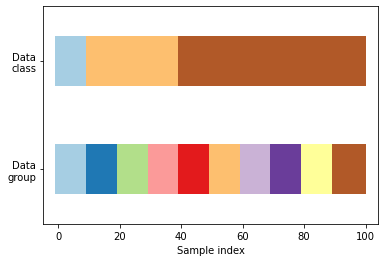

In [3]:
def visualize_groups(classes, groups, name):
    # Visualize dataset groups
    fig, ax = plt.subplots()
    ax.scatter(range(len(groups)),  [.5] * len(groups),  c=groups,  marker='_', lw=50, cmap=cmap_data)
    ax.scatter(range(len(groups)),  [3.5] * len(groups), c=classes, marker='_', lw=50, cmap=cmap_data)
    ax.set(ylim=[-1, 5], yticks=[.5, 3.5], yticklabels=['Data\ngroup', 'Data\nclass'], xlabel="Sample index")

visualize_groups(y, groups, 'no groups')

In [4]:
def plot_cv_indices(cv, X, y, group, ax, n_splits, lw=10):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y, groups=group)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(range(len(indices)), [ii + .5] * len(indices),
                   c=indices, marker='_', lw=lw, cmap=cmap_cv,
                   vmin=-.2, vmax=1.2)

    # Plot the data classes and groups at the end
    ax.scatter(range(len(X)), [ii + 1.5] * len(X),
               c=y, marker='_', lw=lw, cmap=cmap_data)

    ax.scatter(range(len(X)), [ii + 2.5] * len(X),
               c=group, marker='_', lw=lw, cmap=cmap_data)

    # Formatting
    yticklabels = list(range(n_splits)) + ['class', 'group']
    ax.set(yticks=np.arange(n_splits+2) + .5, yticklabels=yticklabels,
           xlabel='Sample index', ylabel="CV iteration",
           ylim=[n_splits+2.2, -.2], xlim=[0, 100])
    ax.set_title('{}'.format(type(cv).__name__), fontsize=15)
    return ax

# Single split

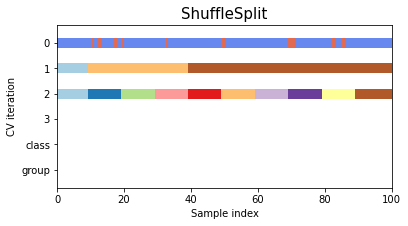

In [16]:
fig, ax = plt.subplots(figsize=(6, 3))
cv = ShuffleSplit(n_splits=1, test_size=.1)
plot_cv_indices(cv, X, y, groups, ax, n_splits);

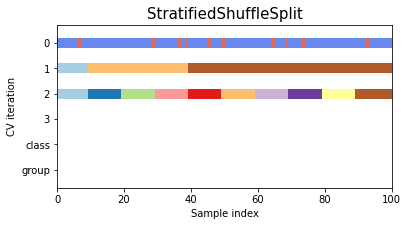

In [27]:

fig, ax = plt.subplots(figsize=(6, 3))
cv = StratifiedShuffleSplit(n_splits=1, test_size=.1)
plot_cv_indices(cv, X, y, groups, ax, n_splits);

# Cross Validation

In [ ]:
n_splits = 4

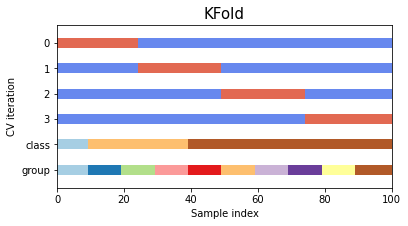

In [8]:
fig, ax = plt.subplots(figsize=(6, 3))
cv = KFold(n_splits)
plot_cv_indices(cv, X, y, groups, ax, n_splits);

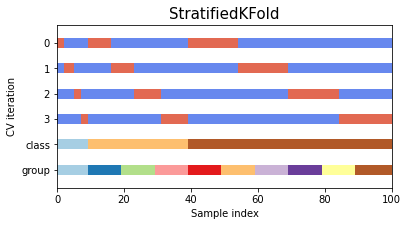

In [9]:
fig, ax = plt.subplots(figsize=(6, 3))
cv = StratifiedKFold(n_splits)
plot_cv_indices(cv, X, y, groups, ax, n_splits);

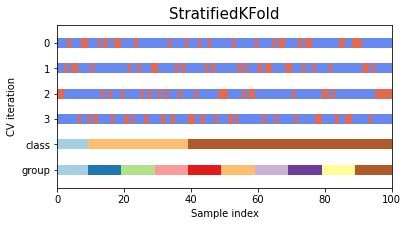

In [29]:
fig, ax = plt.subplots(figsize=(6, 3))
cv = StratifiedKFold(n_splits, shuffle=True)
plot_cv_indices(cv, X, y, groups, ax, n_splits);

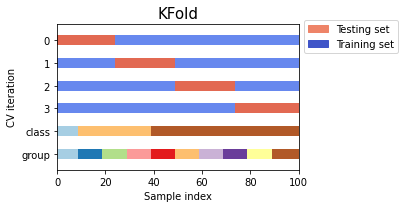

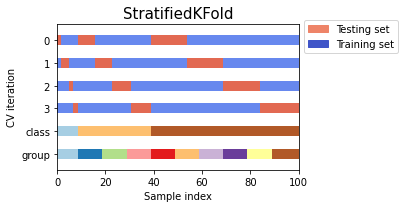

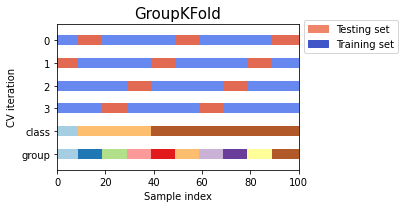

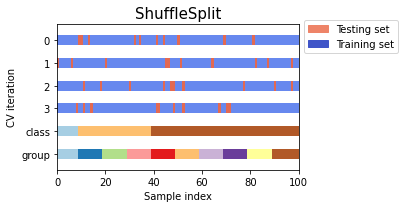

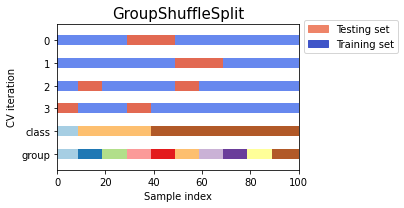

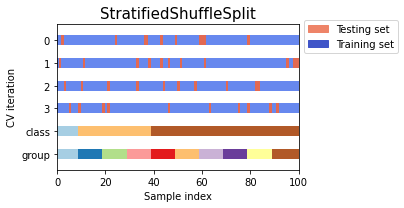

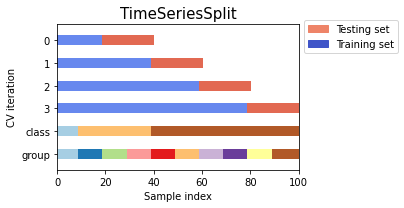

In [31]:
cvs = [KFold, StratifiedKFold, GroupKFold, ShuffleSplit,
       GroupShuffleSplit, StratifiedShuffleSplit, TimeSeriesSplit]


for cv in cvs:
    this_cv = cv(n_splits=n_splits)
    fig, ax = plt.subplots(figsize=(6, 3))
    plot_cv_indices(this_cv, X, y, groups, ax, n_splits)

    ax.legend([Patch(color=cmap_cv(.8)), Patch(color=cmap_cv(.02))],
              ['Testing set', 'Training set'], loc=(1.02, .8))
    # Make the legend fit
    plt.tight_layout()
    fig.subplots_adjust(right=.7)
plt.show()

In [ ]:
kf = KFold(n_splits=12, shuffle=False)
indices = [add_2017(x, y) for x, y in kf.split(X_players_train[len_2017:len_train_reorient], 
                                               y_mae_train[len_2017:len_train_reorient])]



rskf = RepeatedStratifiedKFold(n_splits=2, n_repeats=2,random_state=36851234)